Title: "Predicting Elementary and High-school students Enrollment Nationwide by the Education Revenue on Each levels" 
General Assemble Program Final Project Research proposal
Author: Yu Zhang
output: Presentation and Reports

1. Introduction

The elementary and high school students' enrollment are the prominent perspective of various stakeholders. The education policymakers are engaged in maintaining and expanding the enrollments by asking the questions like how much public resource should be devoted to elementary and high school students related to their competing demands on instructional spending, expenditure and fundings from the State, federal and districts revenue. Both families and Federal education census are expecting to know much are the financial capacities to provide quality education and sustain the livinghood predict the students enrollments. 

The current study use NAEP census survey data (National Assessment of Educational Progress), and combined with Educational financing data from the National Finance Census (National Center for Educational Statistics) to predict the elementary and high school students enrollments. In the study the educational finance features are characterized by the amount range to be the index of educational financial capacity, by which we might predict the elementary and high school students enrollment to be influenced by the features of federal, State, and districts revenue, expenditure, spending on instruction. As educational scholar and researcher Joan Herman'description: "the keys resources, educational financing have been imposed the role to expand the enrollment and institutes. On the performance standards, the evaluation can be introduced to predict the student's performance"(2011). 


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import cross_val_score

plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14
plt.style.use("fivethirtyeight")


from sklearn.linear_model import LinearRegression

In [4]:
districts_f = pd.read_csv("./data/edu_data.csv", sep=',')

In [5]:
districts_new = districts_f.iloc[::,1:]

In [6]:
districts_new.head()

,year,state,name,enrollment,total_revenue,federal_revenue,state_revenue,local_revenue,expenditure,current_spending_instruction,current_spending,other_spending,total_capital,score,test_subject,grade
0,1996,California,FRESNO UNIFIED SCH DIST,77880.0,443769.0,52321.0,270376.0,121072.0,439009.0,230738.0,128914.0,40249.0,38267.0,209.129083,Mathematics,4
1,1996,California,FRESNO UNIFIED SCH DIST,77880.0,443769.0,52321.0,270376.0,121072.0,439009.0,230738.0,128914.0,40249.0,38267.0,262.772478,Mathematics,8
2,1996,California,LONG BEACH UNI SCH DIST,80520.0,432918.0,56099.0,261746.0,115073.0,453934.0,242254.0,127883.0,42349.0,41430.0,209.129083,Mathematics,4
3,1996,California,LONG BEACH UNI SCH DIST,80520.0,432918.0,56099.0,261746.0,115073.0,453934.0,242254.0,127883.0,42349.0,41430.0,262.772478,Mathematics,8
4,1996,California,LOS ANGELES CO OFF OF EDUCATION,0.0,406848.0,153647.0,138570.0,114631.0,400200.0,206861.0,141993.0,11734.0,16885.0,209.129083,Mathematics,4


In [7]:
districts_new.shape

(3832, 16)

In [8]:
districts_new.dtypes

year                              int64
state                            object
name                             object
enrollment                      float64
total_revenue                   float64
federal_revenue                 float64
state_revenue                   float64
local_revenue                   float64
expenditure                     float64
current_spending_instruction    float64
current_spending                float64
other_spending                  float64
total_capital                   float64
score                           float64
test_subject                     object
grade                             int64
dtype: object

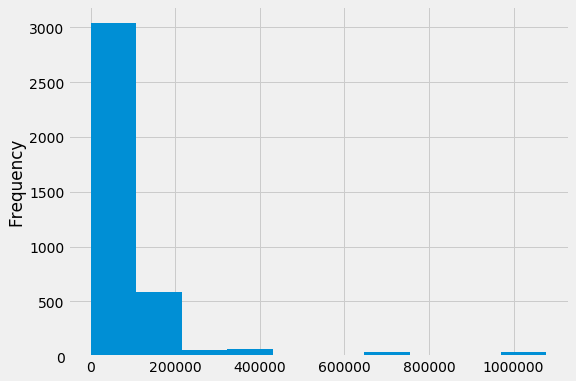

In [9]:
districts_new.enrollment.plot(kind = 'hist')

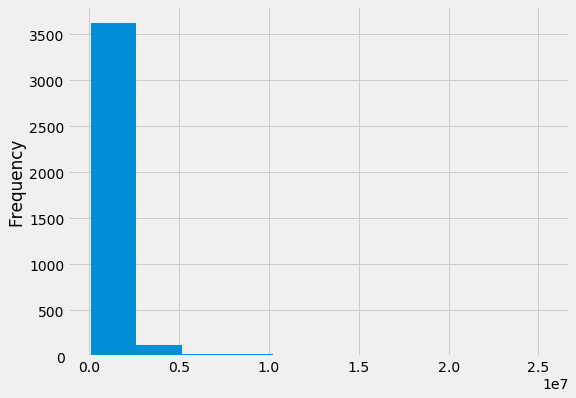

In [10]:
districts_new.total_revenue.plot(kind = 'hist')

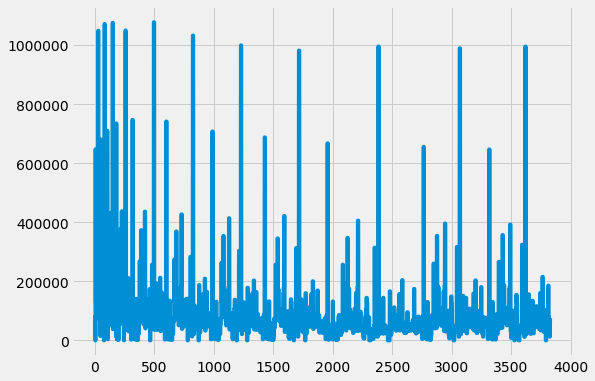

In [11]:
districts_new.enrollment.plot();

relable the new varibles 

In [12]:
def relabel(x):
    if (x <50000):
        rel = 0
    elif (x > 50000 and x < 70000):
        rel = 1
    else:
        rel = 2
    return rel

In [13]:
districts_new['enrollment_encoded'] = districts_new.enrollment.apply(relabel)

In [14]:
districts_new['expenditure_encoded'] = districts_new.expenditure.apply(relabel)

In [15]:
districts_new['total_revenue_encoded'] = districts_new.total_revenue.apply(relabel)

In [16]:
districts_new['current_spending_encoded'] = districts_new.current_spending.apply(relabel)

In [17]:
districts_new.head()

,year,state,name,enrollment,total_revenue,federal_revenue,state_revenue,local_revenue,expenditure,current_spending_instruction,current_spending,other_spending,total_capital,score,test_subject,grade,enrollment_encoded,expenditure_encoded,total_revenue_encoded,current_spending_encoded
0,1996,California,FRESNO UNIFIED SCH DIST,77880.0,443769.0,52321.0,270376.0,121072.0,439009.0,230738.0,128914.0,40249.0,38267.0,209.129083,Mathematics,4,2,2,2,2
1,1996,California,FRESNO UNIFIED SCH DIST,77880.0,443769.0,52321.0,270376.0,121072.0,439009.0,230738.0,128914.0,40249.0,38267.0,262.772478,Mathematics,8,2,2,2,2
2,1996,California,LONG BEACH UNI SCH DIST,80520.0,432918.0,56099.0,261746.0,115073.0,453934.0,242254.0,127883.0,42349.0,41430.0,209.129083,Mathematics,4,2,2,2,2
3,1996,California,LONG BEACH UNI SCH DIST,80520.0,432918.0,56099.0,261746.0,115073.0,453934.0,242254.0,127883.0,42349.0,41430.0,262.772478,Mathematics,8,2,2,2,2
4,1996,California,LOS ANGELES CO OFF OF EDUCATION,0.0,406848.0,153647.0,138570.0,114631.0,400200.0,206861.0,141993.0,11734.0,16885.0,209.129083,Mathematics,4,0,2,2,2


In [18]:
districts_new.shape

(3832, 20)

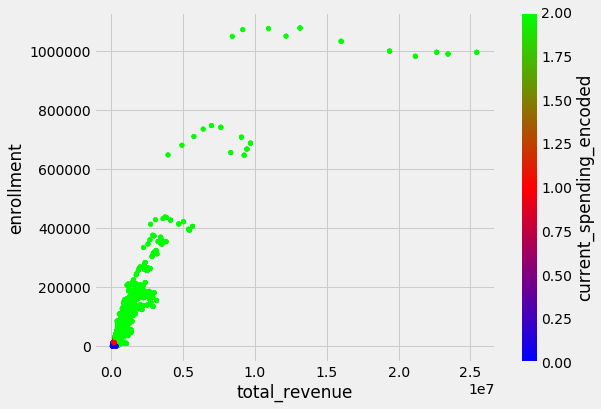

In [19]:
districts_new.plot(kind='scatter', x='total_revenue', y='enrollment', c='current_spending_encoded', colormap='brg');

In [20]:
districts_new.current_spending_encoded.shape

(3832,)

In [21]:
districts_new1 = districts_new[['total_revenue','state_revenue','federal_revenue','enrollment', 'current_spending_encoded','expenditure_encoded']]

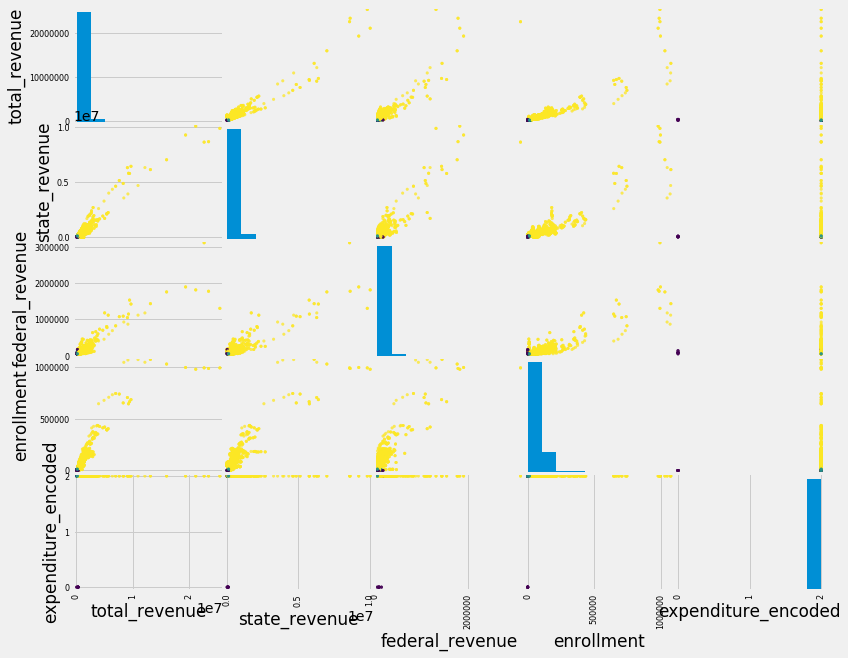

In [22]:
pd.plotting.scatter_matrix(districts_new1.drop('current_spending_encoded', axis=1), c=districts_new1.current_spending_encoded, figsize=(12, 10));

In [87]:
features = ['total_revenue','state_revenue','federal_revenue','current_spending_encoded','expenditure_encoded']

In [88]:
# Create X and y.
X = districts_new[features]
y = districts_new.enrollment_encoded

In [25]:
print(districts_new.enrollment_encoded.shape)

(3832,)


In [90]:
print((X.shape))

(3832, 5)


Train the model on the training set (using K=1).

In [79]:
print((y.shape))

(3832,)


In [ ]:
metrics of accuracy score

In [96]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_class = knn.predict(X_test)
print((metrics.accuracy_score(y_test, y_pred_class)))

0.8862212943632568


In [95]:
X_test.shape

(958, 5)

In [99]:
##cross validation for classification
from sklearn.model_selection import cross_val_score, cross_val_predict
knn = KNeighborsClassifier(n_neighbors = 5)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(scores)
print(scores.mean())

[0.65625    0.65364583 0.75456919 0.7075718  0.80678851 0.77545692
 0.82245431 0.78067885 0.80678851 0.77023499]
0.753443891427328


In [30]:
## Examine the class distribution from the training set.

most_freq_class = y_train.value_counts().index[0]

print(y_train.value_counts())
most_freq_class

0    1287
2    1108
1     479
Name: enrollment_encoded, dtype: int64


0

In [31]:
## Compute null accuracy
y_test.value_counts()[most_freq_class] / len(y_test)

0.4290187891440501

In [32]:
## Tuning a KNN Model
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X, y)

y_pred_class = knn.predict(X)

In [33]:
knn.predict_proba(X)

array([[0.6, 0. , 0.4],
       [0.6, 0. , 0.4],
       [0.6, 0. , 0.4],
       ...,
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ]])

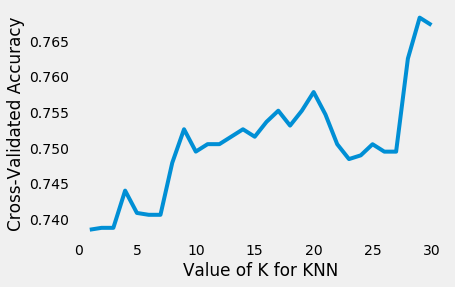

In [101]:
## we could choose different neighbours to see which K is the best K
k_range = range(1, 31)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())
    
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.grid(b=None)
plt.savefig('data/best_k.png', transparent=True)
plt.show()    

#### Search for the "best" value of K.

In [38]:
k_range = list(range(1, 101))
training_error = []
testing_error = []

# Find test accuracy for all values of K between 1 and 100 (inclusive).
for k in k_range:

    # Instantiate the model with the current K value.
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Calculate training error (error = 1 - accuracy).
    y_pred_class = knn.predict(X)
    training_accuracy = metrics.accuracy_score(y, y_pred_class)
    training_error.append(1 - training_accuracy)
    
    # Calculate testing error.
    y_pred_class = knn.predict(X_test)
    testing_accuracy = metrics.accuracy_score(y_test, y_pred_class)
    testing_error.append(1 - testing_accuracy)

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

<a id="training-error-versus-testing-error"></a>
### Training Error Versus Testing Error

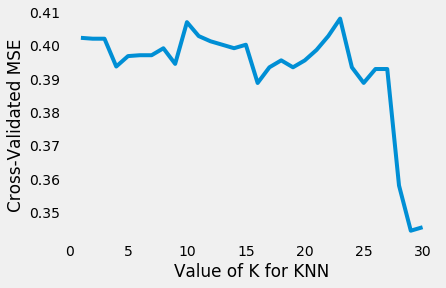

In [58]:
import matplotlib.pyplot as plt
k_range = range(1, 31)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    loss = abs(cross_val_score(knn, X, y, cv=5, scoring='neg_mean_squared_error'))
    k_scores.append(loss.mean())
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated MSE')
plt.grid(b=None)
plt.savefig('data/testing_training_error.png', transparent=True)
plt.show()

Separate feature matrix and response for scikit-learn.

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)

In [46]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [47]:
# Calculate testing error.
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train, y_train)

y_pred_class = knn.predict(X_test)
testing_accuracy = metrics.accuracy_score(y_test, y_pred_class)
testing_error = 1 - testing_accuracy

print(testing_error)

0.1931106471816284


In [48]:
from sklearn.metrics import confusion_matrix

Conclusion
The testing error increased with the N and stable after K = 29. The results indicated the best model of KNN for neighhour numbers = 29. 